## Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

## Importing the Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Setting the Index

In [5]:
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')

In [6]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## Data Preprocessing

In [8]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [9]:
train = train.drop(['Name','Ticket'],axis = 1)  #Irrelevant Data

In [10]:
test = test.drop(['Name','Ticket'],axis = 1)  #Irrelevant Data

In [11]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


In [12]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,NaN,Q
893,3,female,47.0,1,0,7.0000,NaN,S
894,2,male,62.0,0,0,9.6875,NaN,Q
895,3,male,27.0,0,0,8.6625,NaN,S
896,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,NaN,S
1306,1,female,39.0,0,0,108.9000,C105,C
1307,3,male,38.5,0,0,7.2500,NaN,S


In [13]:
#Dealing with Null Values

In [14]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False)!= 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100 , 2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100 , 2)!= 0]
    data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False)!= 0]
    return pd.concat([total , percent , data_type],axis = 1 , keys = ['Total' , 'Percent' , 'Type'])

In [15]:
missing_percentage(train)

,Total,Percent,Type
Cabin,687,77.10,object
Age,177,19.87,float64
Embarked,2,0.22,object


In [16]:
train.Age.mean()

29.69911764705882

In [17]:
train.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [18]:
train['Age'].fillna(train['Age'].mean() , inplace=True)

In [19]:
train['Embarked'].fillna( "S" , inplace=True)

In [20]:
missing_percentage(train)

,Total,Percent,Type
Cabin,687,77.1,object


In [21]:
train.drop(['Cabin'],axis=1,inplace=True)

In [22]:
missing_percentage(train)

,Total,Percent,Type


In [23]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [24]:
missing_percentage(test)

,Total,Percent,Type
Cabin,327,78.23,object
Age,86,20.57,float64
Fare,1,0.24,float64


In [25]:
test.Age.mean()

30.272590361445783

In [26]:
test.Fare.mean()

35.6271884892086

In [27]:
test['Age'].fillna(test['Age'].mean() , inplace=True)

In [28]:
test['Fare'].fillna(test['Fare'].mean() , inplace=True)

In [29]:
missing_percentage(test)

,Total,Percent,Type
Cabin,327,78.23,object


In [30]:
test.drop(['Cabin'], axis=1, inplace=True)

In [31]:
missing_percentage(test)

,Total,Percent,Type


In [32]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.50000,0,0,7.8292,Q
893,3,female,47.00000,1,0,7.0000,S
894,2,male,62.00000,0,0,9.6875,Q
895,3,male,27.00000,0,0,8.6625,S
896,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,30.27259,0,0,8.0500,S
1306,1,female,39.00000,0,0,108.9000,C
1307,3,male,38.50000,0,0,7.2500,S


In [33]:
train.Age.min()

0.42

In [34]:
train.Age.max()

80.0

In [35]:
train.loc[train['Age']<=10 ,'Age'] = 0                        #Children
train.loc[(train['Age']>10)&(train['Age']<=18) ,'Age'] = 1    #Teens
train.loc[(train['Age']>18)&(train['Age']<=25),'Age'] = 2     #Youth
train.loc[(train['Age']>25)&(train['Age']<=50) ,'Age'] = 3    #Adults
train.loc[train['Age']>50 ,'Age'] = 4                         #Seniors

In [36]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,2.0,1,0,7.2500,S
2,1,1,female,3.0,1,0,71.2833,C
3,1,3,female,3.0,0,0,7.9250,S
4,1,1,female,3.0,1,0,53.1000,S
5,0,3,male,3.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,3.0,0,0,13.0000,S
888,1,1,female,2.0,0,0,30.0000,S
889,0,3,female,3.0,1,2,23.4500,S


In [37]:
test.loc[test['Age']<=10 ,'Age'] = 0                       #Children
test.loc[(test['Age']>10)&(test['Age']<=18) ,'Age'] = 1    #Teens
test.loc[(test['Age']>18)&(test['Age']<=25),'Age'] = 2     #Youth
test.loc[(test['Age']>25)&(test['Age']<=50) ,'Age'] = 3    #Adults
test.loc[test['Age']>50 ,'Age'] = 4                        #Seniors

In [38]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,3.0,0,0,7.8292,Q
893,3,female,3.0,1,0,7.0000,S
894,2,male,4.0,0,0,9.6875,Q
895,3,male,3.0,0,0,8.6625,S
896,3,female,2.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,3.0,0,0,8.0500,S
1306,1,female,3.0,0,0,108.9000,C
1307,3,male,3.0,0,0,7.2500,S


In [39]:
train['Sex'].replace('female',0, inplace=True)
train['Sex'].replace( 'male',1, inplace=True)

In [40]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
train['Embarked'].replace('Q', 0, inplace=True)
train['Embarked'].replace('C', 1, inplace=True)
train['Embarked'].replace('S', 2, inplace=True)

In [42]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,2.0,1,0,7.2500,2
2,1,1,0,3.0,1,0,71.2833,1
3,1,3,0,3.0,0,0,7.9250,2
4,1,1,0,3.0,1,0,53.1000,2
5,0,3,1,3.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,3.0,0,0,13.0000,2
888,1,1,0,2.0,0,0,30.0000,2
889,0,3,0,3.0,1,2,23.4500,2


In [43]:
test['Sex'].replace('female',0, inplace=True)
test['Sex'].replace( 'male',1, inplace=True)

In [44]:
test['Embarked'].replace('Q', 0, inplace=True)
test['Embarked'].replace('C', 1, inplace=True)
test['Embarked'].replace('S', 2, inplace=True)

In [45]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,3.0,0,0,7.8292,0
893,3,0,3.0,1,0,7.0000,2
894,2,1,4.0,0,0,9.6875,0
895,3,1,3.0,0,0,8.6625,2
896,3,0,2.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
1305,3,1,3.0,0,0,8.0500,2
1306,1,0,3.0,0,0,108.9000,1
1307,3,1,3.0,0,0,7.2500,2


## Data Analysis

In [46]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,2.0,1,0,7.2500,2
2,1,1,0,3.0,1,0,71.2833,1
3,1,3,0,3.0,0,0,7.9250,2
4,1,1,0,3.0,1,0,53.1000,2
5,0,3,1,3.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,3.0,0,0,13.0000,2
888,1,1,0,2.0,0,0,30.0000,2
889,0,3,0,3.0,1,2,23.4500,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

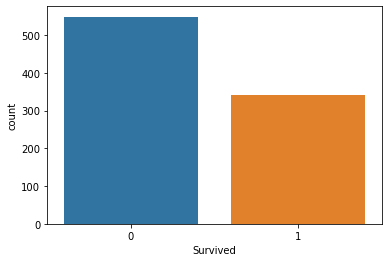

In [47]:
sns.countplot('Survived' , data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

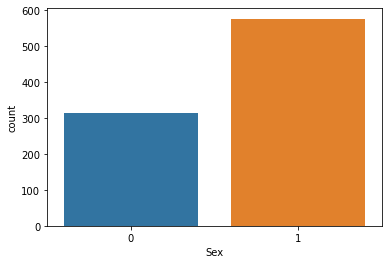

In [48]:
sns.countplot('Sex' , data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

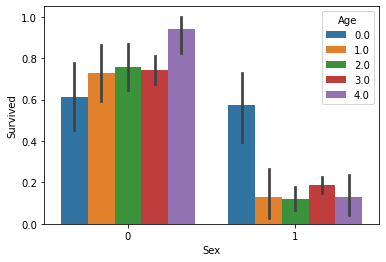

In [49]:
sns.barplot('Sex','Survived',data=train, hue='Age')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


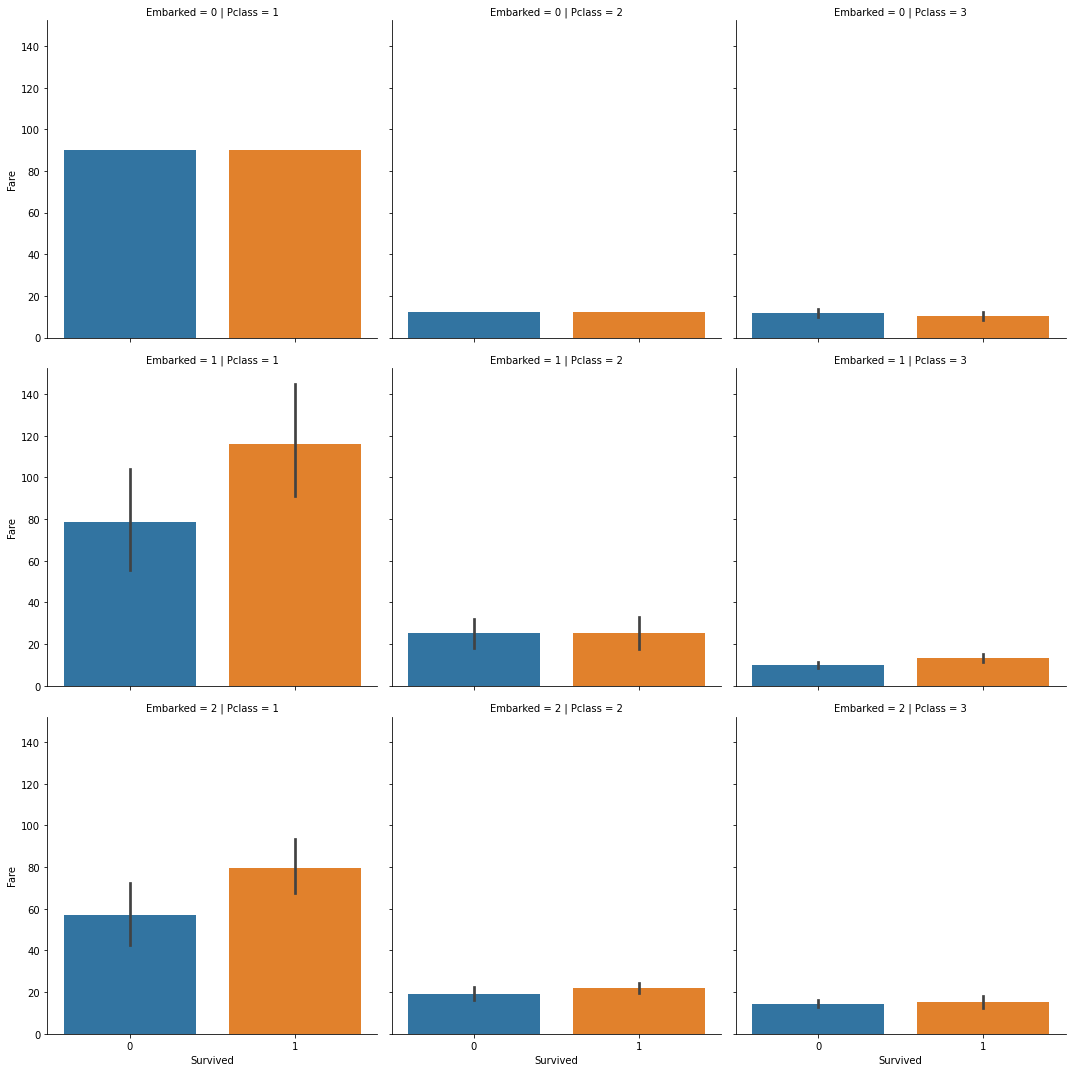

In [50]:
sns.catplot('Survived','Fare',data=train , kind='bar' , col='Pclass' ,row='Embarked')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='SibSp'>

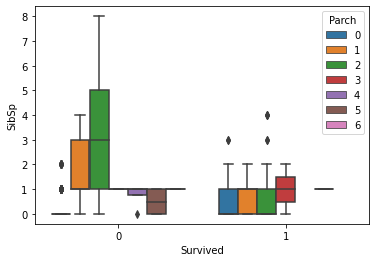

In [51]:
sns.boxplot('Survived','SibSp', data=train , hue = 'Parch')

## Modelling  "Nearest Neighbor"

## Normalization

In [52]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,2.0,1,0,7.2500,2
2,1,1,0,3.0,1,0,71.2833,1
3,1,3,0,3.0,0,0,7.9250,2
4,1,1,0,3.0,1,0,53.1000,2
5,0,3,1,3.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,3.0,0,0,13.0000,2
888,1,1,0,2.0,0,0,30.0000,2
889,0,3,0,3.0,1,2,23.4500,2


In [53]:
train["Fare"] = train["Fare"]/train["Fare"].max()

In [54]:
test["Fare"] = test["Fare"]/test["Fare"].max()

In [55]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,2.0,1,0,0.014151,2
2,1,1,0,3.0,1,0,0.139136,1
3,1,3,0,3.0,0,0,0.015469,2
4,1,1,0,3.0,1,0,0.103644,2
5,0,3,1,3.0,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
887,0,2,1,3.0,0,0,0.025374,2
888,1,1,0,2.0,0,0,0.058556,2
889,0,3,0,3.0,1,2,0.045771,2


In [56]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,3.0,0,0,0.015282,0
893,3,0,3.0,1,0,0.013663,2
894,2,1,4.0,0,0,0.018909,0
895,3,1,3.0,0,0,0.016908,2
896,3,0,2.0,1,1,0.023984,2
...,...,...,...,...,...,...,...
1305,3,1,3.0,0,0,0.015713,2
1306,1,0,3.0,0,0,0.212559,1
1307,3,1,3.0,0,0,0.014151,2


## Splitting the Data (Input , Output)

In [57]:
x = train.iloc[:,1:]
y = train.iloc[:,:1]

In [58]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,2.0,1,0,0.014151,2
2,1,0,3.0,1,0,0.139136,1
3,3,0,3.0,0,0,0.015469,2
4,1,0,3.0,1,0,0.103644,2
5,3,1,3.0,0,0,0.015713,2
...,...,...,...,...,...,...,...
887,2,1,3.0,0,0,0.025374,2
888,1,0,2.0,0,0,0.058556,2
889,3,0,3.0,1,2,0.045771,2


In [59]:
y

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


## Model

In [60]:
model = KNeighborsClassifier()

In [61]:
model.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [62]:
model.score(x,y)

0.8597081930415263

## Predictions

In [63]:
predictions = model.predict(test)

In [64]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Saving Predicted Values

In [65]:
Submission = test

In [66]:
Submission

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,3.0,0,0,0.015282,0
893,3,0,3.0,1,0,0.013663,2
894,2,1,4.0,0,0,0.018909,0
895,3,1,3.0,0,0,0.016908,2
896,3,0,2.0,1,1,0.023984,2
...,...,...,...,...,...,...,...
1305,3,1,3.0,0,0,0.015713,2
1306,1,0,3.0,0,0,0.212559,1
1307,3,1,3.0,0,0,0.014151,2


In [67]:
Submission['Survived'] = predictions

In [68]:
Submission

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
892,3,1,3.0,0,0,0.015282,0,0
893,3,0,3.0,1,0,0.013663,2,0
894,2,1,4.0,0,0,0.018909,0,0
895,3,1,3.0,0,0,0.016908,2,0
896,3,0,2.0,1,1,0.023984,2,0
...,...,...,...,...,...,...,...,...
1305,3,1,3.0,0,0,0.015713,2,0
1306,1,0,3.0,0,0,0.212559,1,1
1307,3,1,3.0,0,0,0.014151,2,0


In [69]:
Submission.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'], axis =1 ,inplace= True)

In [70]:
Submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [71]:
Submission = Submission.to_csv("Submission1.csv")